# Q1

In [73]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from keras.layers import Dense, Input, GaussianNoise, Layer, Activation, Dropout
from keras.models import Model
from keras.optimizers import SGD, Adam

In [74]:
# collect and format data

data = np.load('counts.npy')
#labels = pd.read_csv('labels.txt', header = None)
labels = np.loadtxt("labels.txt")

input_dim = data.shape[1]

In [46]:
# define autoencoder with latent embedding of size 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(1000, activation='relu')(input_layer)
encoder = Dense(250, activation='relu')(encoder)
encoder = Dense(100, activation='relu')(encoder)

encoder_output = Dense(10)(encoder)  # latent space

decoder = Dense(100, activation='relu')(encoder_output)
decoder = Dense(250, activation='relu')(decoder)
decoder = Dense(1000, activation='relu')(decoder)

output_layer = Dense(input_dim)(decoder)

autoencoder_10 = Model(input_layer, output_layer)

# compile and fit

autoencoder_10.compile(optimizer='adam', loss='mse')
autoencoder_10.fit(data, data, epochs=50, batch_size=128, shuffle=True, validation_split=0.1, verbose=0)

# embedding layer

encoder_model_10 = Model(input_layer, encoder_output)
latent_space_10 = encoder_model.predict(data)

157/157 [==============================] - 0s 528us/step


In [48]:
# define autoencoder with latent embedding of size 50

input_layer = Input(shape=(input_dim,))
encoder = Dense(1000, activation='relu')(input_layer)
encoder = Dense(250, activation='relu')(encoder)
encoder = Dense(100, activation='relu')(encoder)

encoder_output = Dense(50)(encoder)  # latent space

decoder = Dense(100, activation='relu')(encoder_output)
decoder = Dense(250, activation='relu')(decoder)
decoder = Dense(1000, activation='relu')(decoder)

output_layer = Dense(input_dim)(decoder)

autoencoder_50 = Model(input_layer, output_layer)

# compile and fit

autoencoder_50.compile(optimizer='adam', loss='mse')
autoencoder_50.fit(data, data, epochs=50, batch_size=128, shuffle=True, validation_split=0.1, verbose=0)

# embedding layer

encoder_model_50 = Model(input_layer, encoder_output)
latent_space_50 = encoder_model.predict(data)

157/157 [==============================] - 0s 899us/step


# Q2

In [49]:
# compute MSE for each model

score_10 = autoencoder_10.evaluate(data, data)
print('MSE for 10 is: ', score_10)

score_50 = autoencoder_50.evaluate(data, data)
print('MSE for 50 is: ', score_50)

157/157 [==============================] - 0s 1ms/step - loss: 2.5213
MSE for 10 is:  2.521306276321411
157/157 [==============================] - 0s 954us/step - loss: 2.4756
MSE for 50 is:  2.47562313079834


### Q2 Discussion

It looks like the smaller latent embedding size of 10 results in slightly higher loss, i.e., slightly worse results. This makes sense because at a lower embedding dimension size, less information exists, which means accurate reconstruction becomes more difficult. This agrees with the loss data where we see worse results (higher loss) for the autoencoder with embedding size of 10.

# Q3

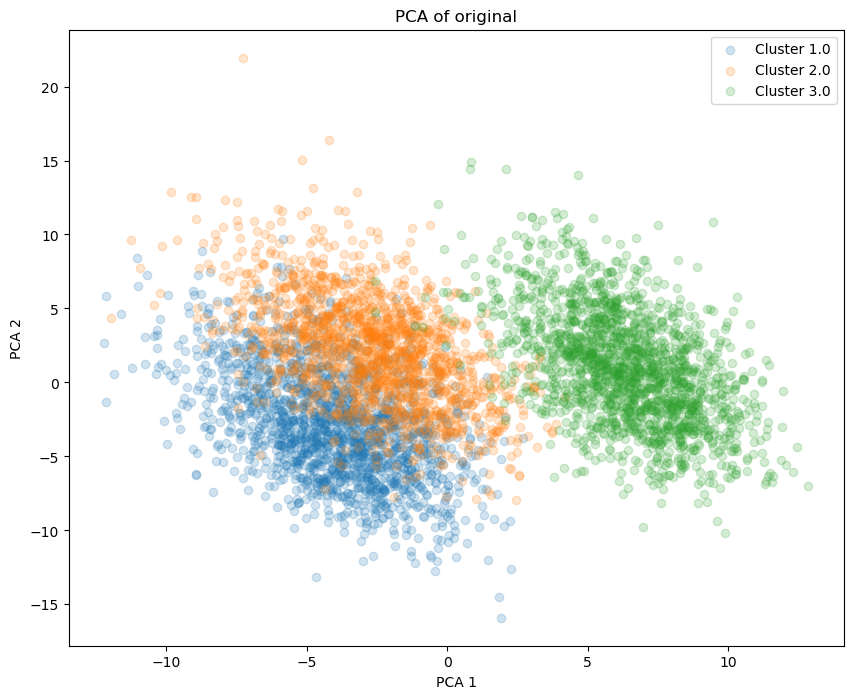

In [62]:
# First let's get a PCA plot of the original

# dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA of original')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

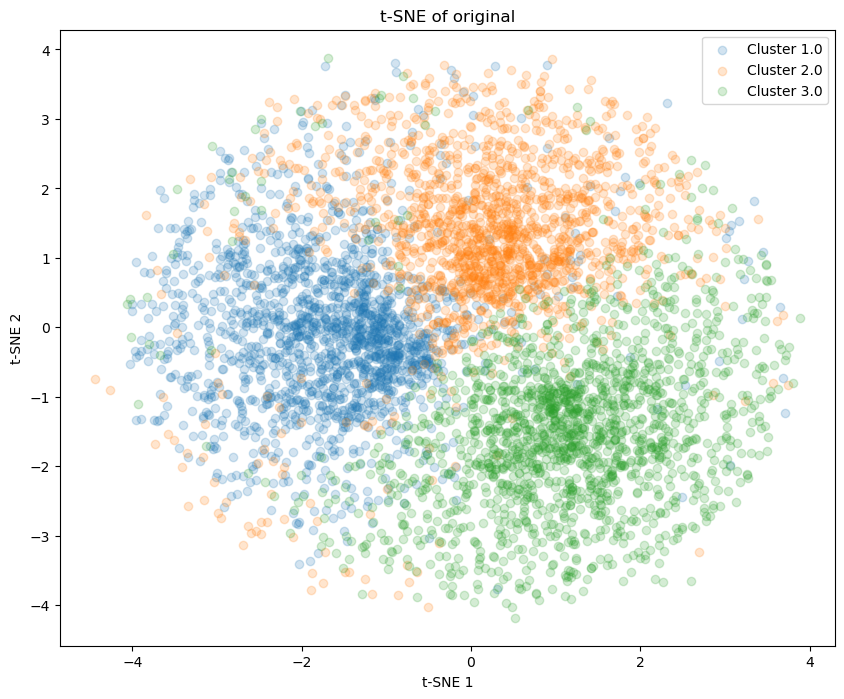

In [63]:
# And the t-SNE plot of the original data

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(data)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE of original')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

157/157 [==============================] - 0s 1ms/step


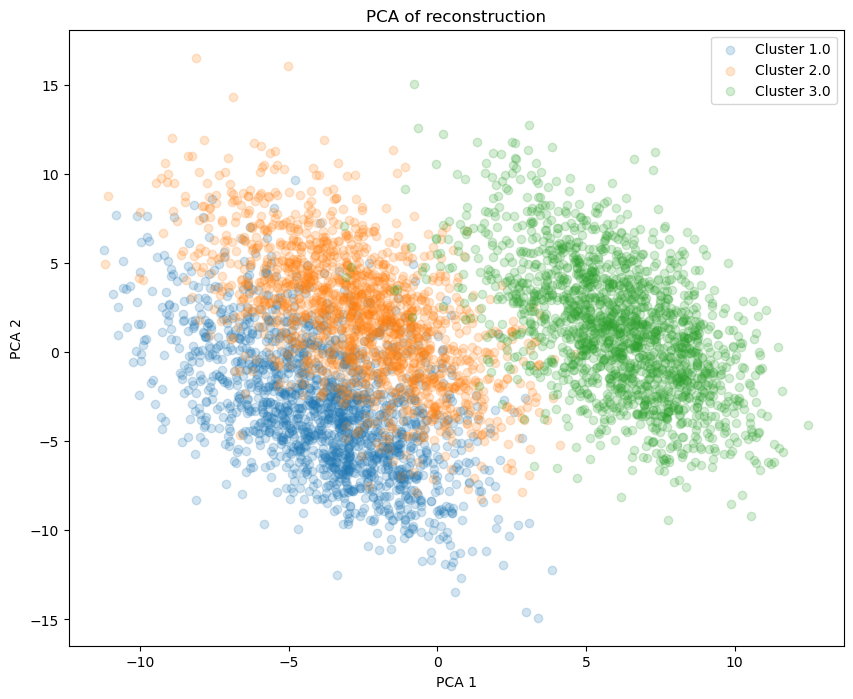

In [64]:
# now let's get a PCA plot of the reconstruction

predictions = autoencoder_10.predict(data)

# dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(predictions)

#Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA of reconstruction')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

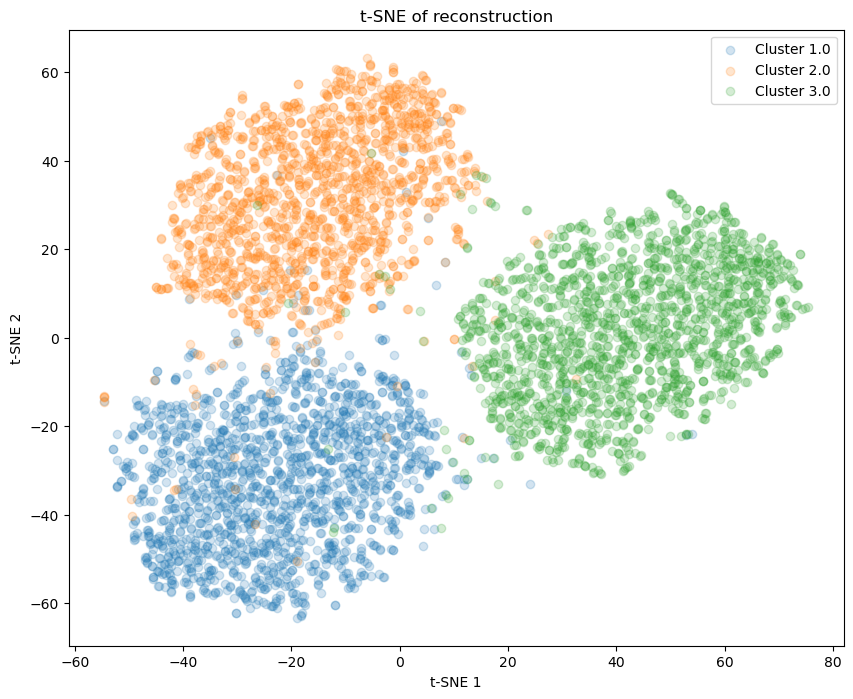

In [65]:
# And finally, t-SNE plot of the reconstructed data

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(predictions)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE of reconstruction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

### Q3 Discussion

The PCA plots for both original and reconstructed data are very similar visually. They are actually difficult to tell apart. They both are not too great, showing overlapping clusters for the 3 labels. Without the labels, it would be hard to distinguish clusters 1 and 2 using PCA.

The t-SNE plots are where we see a difference. The t-SNE plot of the reconstruction has more defined clusters than that of the original's t-SNE plot. The original data's t-SNE visually looks like a huge blob with very little cluster definition. In contrast, the reconstructed data's clusters are clearly visible. This suggests that the reconstruction eliminates difficulties for t-SNE plot creation.

I think the improved performance of the second t-SNE plot may imply that there is less noise in the reconstructed data, when compared to the original. My thinking is that less noise should result in better comprehension of true neighboring data, yielding better clusters with t-SNE. Also, in class the professor mentioned AE's usefulness in denoising. So, given the improved t-SNE performance, I think it is likely that the reconstructed data has less noise.

Also, the similarity of the PCA graphs implies that the reconstructed data still is just as linearly separable / nonseparable as the original data.

# Q4

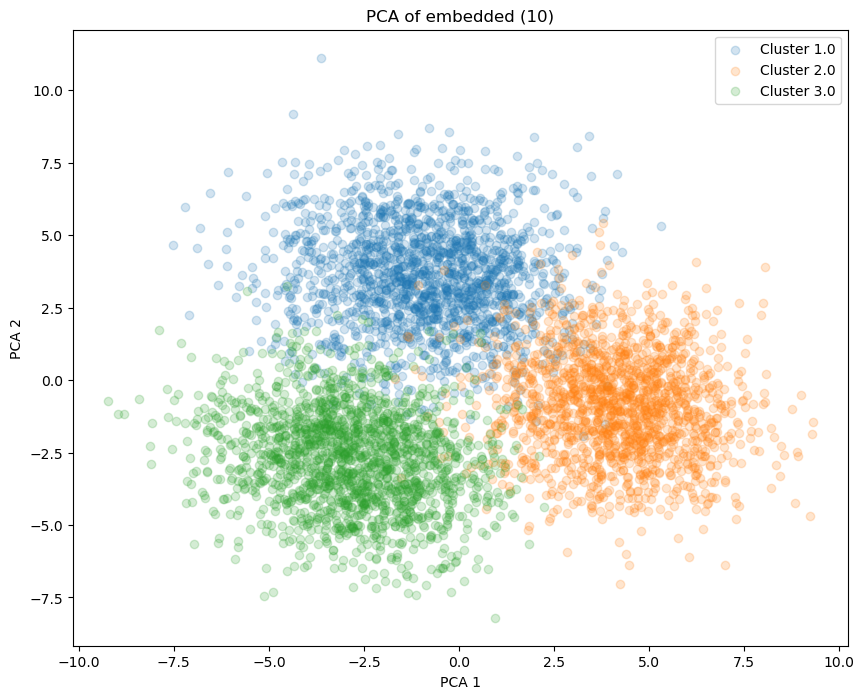

In [66]:
# let's get a PCA of embedded

# dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(latent_space_10)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA of embedded (10)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

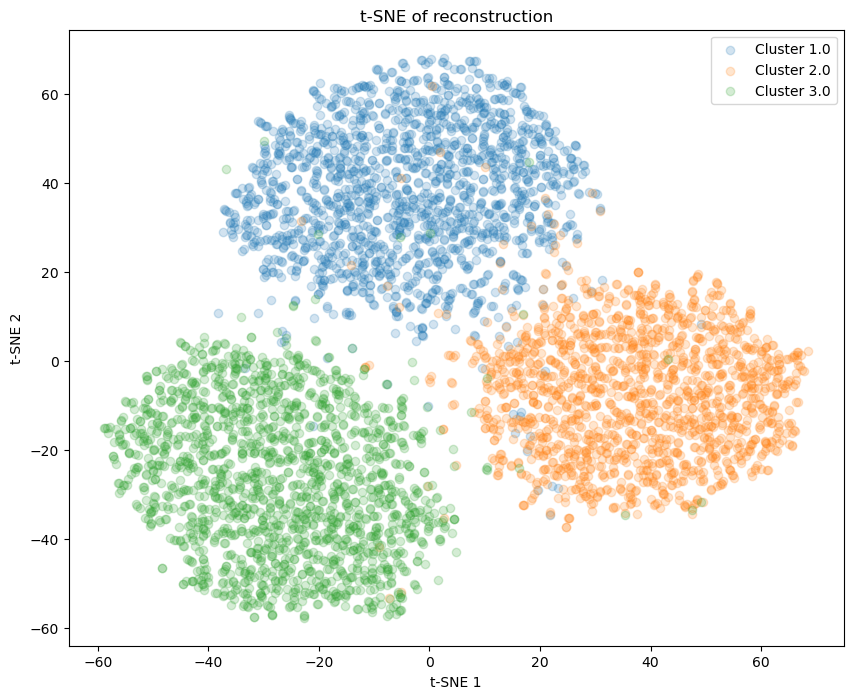

In [67]:
# and also a t-SNE of embedded

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(latent_space_10)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE of reconstruction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

### Q4 discussion

Immediately, it's clear the embedded layer yields improved PCA performance compared to the original. The clusters are visible now. This suggests that the lower dimensionality increases linear separability of the data, thus making the 3 clusters more visible when compared to the original PCA plot.

The difference in t-SNE performance with the original is also very large. Similar to the reconstructed data's t-SNE, here we see the 3 clusters defined much better. This may be due to the lesser noise, and/or ease of finding neighbors at lower dimensions.

# Q5

In [71]:
# pasting in given function from assignment sheet

def nonzero_mse_loss(y_true, y_pred):
    
    # Create a mask for non-zero elements
    
    mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32)
    nonzero_count = tf.reduce_sum(mask) # Count the number of non-zero elements
    
    # Apply the mask to filter out zero elements and Calculate squared difference
    
    nonzero_squared_diff = tf.square(y_true - y_pred*mask)
    
    # Calculate the mean of non-zero squared differences
    
    nonzero_mse = tf.reduce_sum(nonzero_squared_diff) / nonzero_count
    
    return nonzero_mse

In [75]:
# define autoencoder with nonzero mse loss function

input_layer = Input(shape=(input_dim,))
encoder = Dense(1000, activation='relu')(input_layer)
encoder = Dense(250, activation='relu')(encoder)
encoder = Dense(100, activation='relu')(encoder)

encoder_output = Dense(10)(encoder)  # latent space

decoder = Dense(100, activation='relu')(encoder_output)
decoder = Dense(250, activation='relu')(decoder)
decoder = Dense(1000, activation='relu')(decoder)

output_layer = Dense(input_dim)(decoder)

autoencoder_nzmse = Model(input_layer, output_layer)

# compile and fit

autoencoder_nzmse.compile(optimizer='adam', loss = nonzero_mse_loss) # USING NONZERO MSE LOSS
autoencoder_nzmse.fit(data, data, epochs=50, batch_size=128, shuffle=True, validation_split=0.1, verbose=0)

# embedding layer

encoder_model_nzmse = Model(input_layer, encoder_output)
latent_space_nzmse = encoder_model.predict(data)

157/157 [==============================] - 0s 518us/step


In [76]:
score_nzmse = autoencoder_nzmse.evaluate(data, data)
print('MSE for nonzero mse with 10 is: ', score_nzmse)

157/157 [==============================] - 0s 1ms/step - loss: 0.2875
MSE for nonzero mse with 10 is:  0.28747621178627014


157/157 [==============================] - 0s 1ms/step


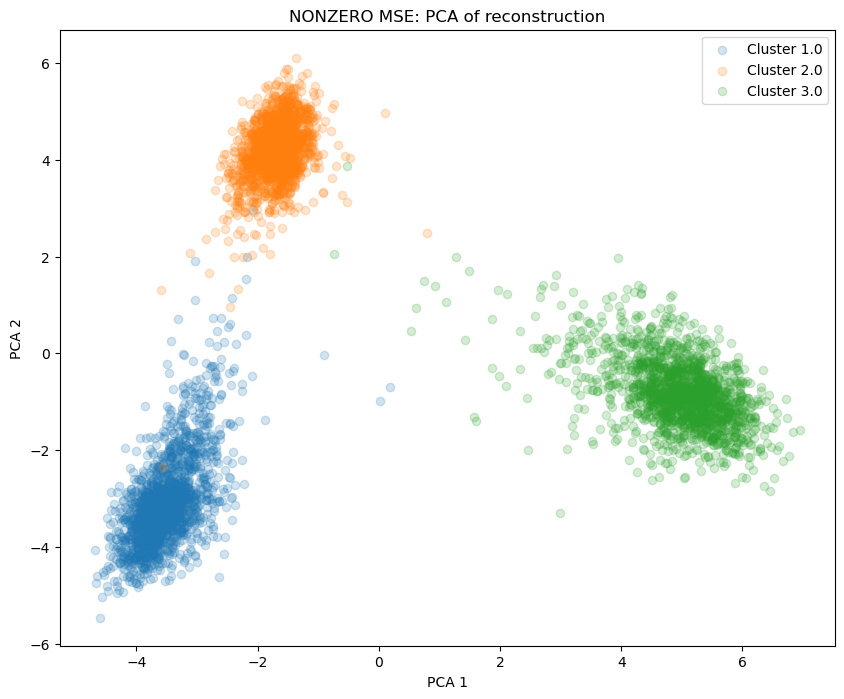

In [81]:
# first, PCA with reconstruction:

nzmse_predictions = autoencoder_nzmse.predict(data)

# dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(nzmse_predictions)

#Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('NONZERO MSE: PCA of reconstruction')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

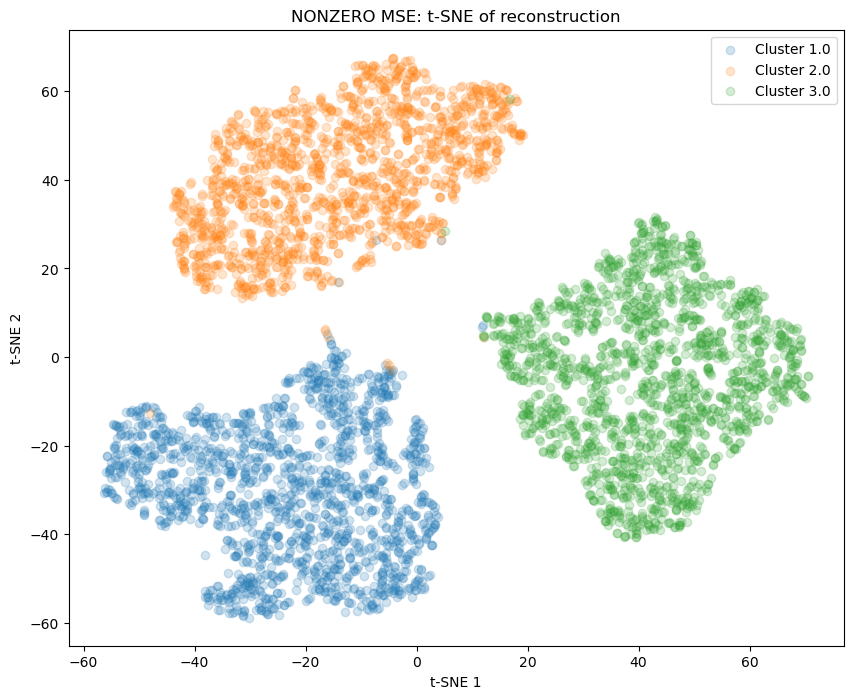

In [82]:
# and t-sne with reconstruction:

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(nzmse_predictions)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('NONZERO MSE: t-SNE of reconstruction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

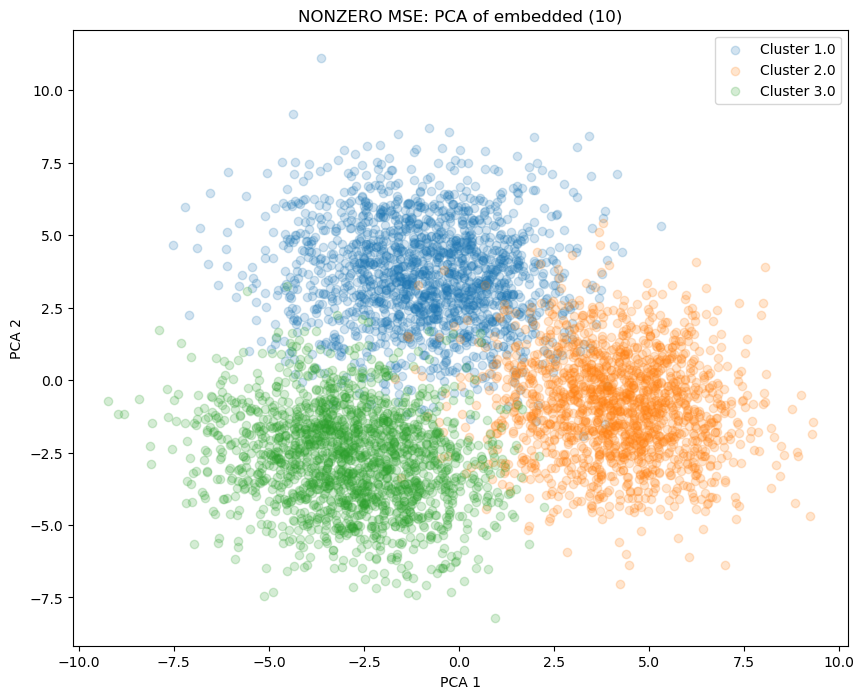

In [83]:
# now, let's get a PCA of embedded

# dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(latent_space_nzmse)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('NONZERO MSE: PCA of embedded (10)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

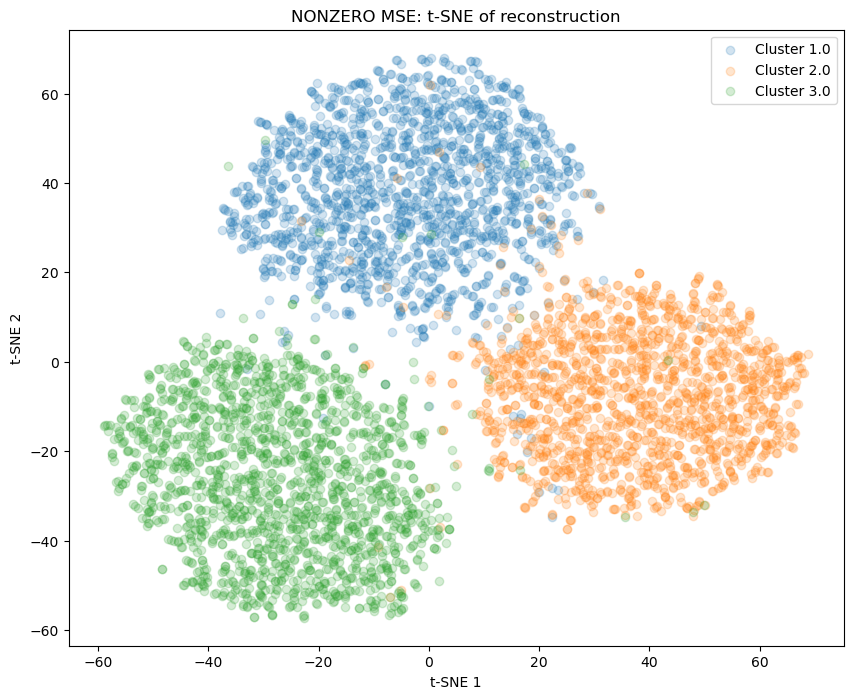

In [84]:
# and finally a t-SNE of embedded

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(latent_space_nzmse)

# Plotting
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('NONZERO MSE: t-SNE of reconstruction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

### Q5 Discussion

Firstly, we observe a far better score: MSE of 0.287. This is a big improvement from the original AE's reconstruction.

Incredibly, the reconstruction plots have both VASTLY improved from the original plots when employing the nonzero mse loss function. The PCA clusters have remarkable density and separation, clearly showing the 3 clusters with few points being off. The reconstruction's t-SNE is not only far better at defining clusters compared to the original, it is the best plot of clusters seen so far. The separation is well-defined, and relatively few errors are made in terms of data points drifting into other clusters. Employing this loss function appears to be a very powerful idea in defining clusters in the reconstruction.

In the embedded layer, we again see improvements from the original. The PCA is now clearly showing 3 clusters, whereas the original had much overlap. The embedded t-SNE also shows clusters better than the original, with 3 well-defined clusters. It is worth noting the similarity of this embedded layer's plots with the previous embedded layer plots. Clearly, the nonzero MSE doesn't hurt embedded layer performance, but it doesn't help much either.

I think the reason for the improvement in reconstructed data's plots with the nonzero MSE may be that the zeroes in the data account for a lot of noise, and filtering them is a quick and effective way to denoise data and get easily separable data. The fact that even the PCA improved is a sign that the data become much more separable, even linearly, so significant denoising may have helped with that.